In [148]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

# plt.style.use("bmh")
sns.set_style("ticks")


# Load Data
Either use the default of loading in the most recent data (i.e., `filename = None`) or fix it to a specific file.

**Good data results:**
- `results_2023-04-05_23:11:28.018483.csv` (does fitting and evaluation)

In [149]:
filename = None
# filename = "results_2023-04-05_23:11:28.018483.csv"
if filename is None:
    filename = sorted(glob.glob("out/data/*.csv"))[-1]
else:
    filename = Path(f"out/data/{filename}")

print(f"{filename=}")
data = pd.read_csv(filename)
data = data.replace(to_replace={
    "no_store": "FuncX",
    "proxystore": "EndpointStore"
})
# data.head()

filename='out/data/results_2023-04-05_23:11:28.018483.csv'


,round,endpoint_name,accuracy,loss,transfer_time,model_size_bytes,local,test_accuracy,test_loss,num_hidden_layers,store
0,1.0,hawfinch,0.22,3.235920,1.001036,240.0,False,0.4121,3.235920,1,FuncX
1,1.0,kestrel,0.17,3.677193,1.984196,240.0,False,0.4121,3.677193,1,FuncX
2,1.0,ryerson,0.18,4.169635,2.390807,240.0,False,0.4121,4.169635,1,FuncX
3,1.0,jetson,0.11,3.763748,3.205699,240.0,False,0.4121,3.763748,1,FuncX
4,2.0,hawfinch,0.58,1.194793,1.640060,240.0,False,0.6155,1.194793,1,FuncX


In [195]:
funcx_df = pd.read_csv(Path("out/data/results_2023-04-06_10:15:47.121014__funcx.csv"))
proxy_df = pd.read_csv(Path("out/data/results_2023-04-06_13:09:39.210862_proxystore.csv"))
data = pd.concat([funcx_df, proxy_df])
data.head()

,round,endpoint_name,transfer_time,data_transfer_size,model_param_size,model_arch_size,local,test_accuracy,test_loss,train_accuracy,train_loss,num_hidden_blocks,store,time_taken_for_process
0,1.0,hawfinch,3.150909,2281716.0,2281615.0,5596.0,False,0.5002,3.525516,0.20,3.525516,1,no_store,158.40915
1,1.0,kestrel,4.464043,2281716.0,2281615.0,5596.0,False,0.5002,3.440624,0.24,3.440624,1,no_store,158.40915
2,1.0,ryerson,4.977898,2281716.0,2281615.0,5596.0,False,0.5002,3.098623,0.21,3.098623,1,no_store,158.40915
3,1.0,jetson,4.599578,2281716.0,2281615.0,5596.0,False,0.5002,3.867584,0.19,3.867584,1,no_store,158.40915
4,2.0,hawfinch,3.505748,2281716.0,2281615.0,5596.0,False,0.5511,1.181808,0.59,1.181808,1,no_store,158.40915


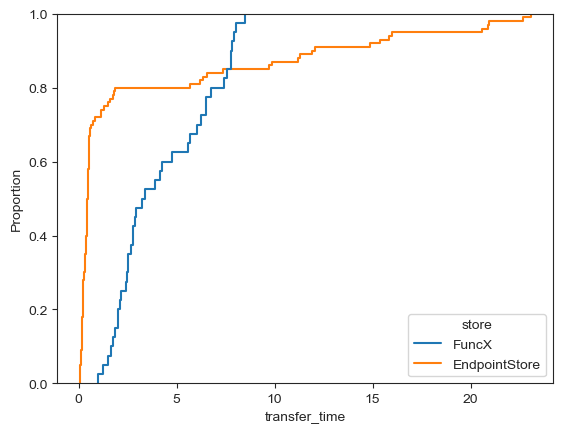

In [150]:
sns.ecdfplot(data=data, x="transfer_time", hue="store")
plt.savefig(Path("out/plots/transfer_time.pdf"))
plt.show()

In [151]:
print(data["transfer_time"].iloc[0])

1.0010364055633545


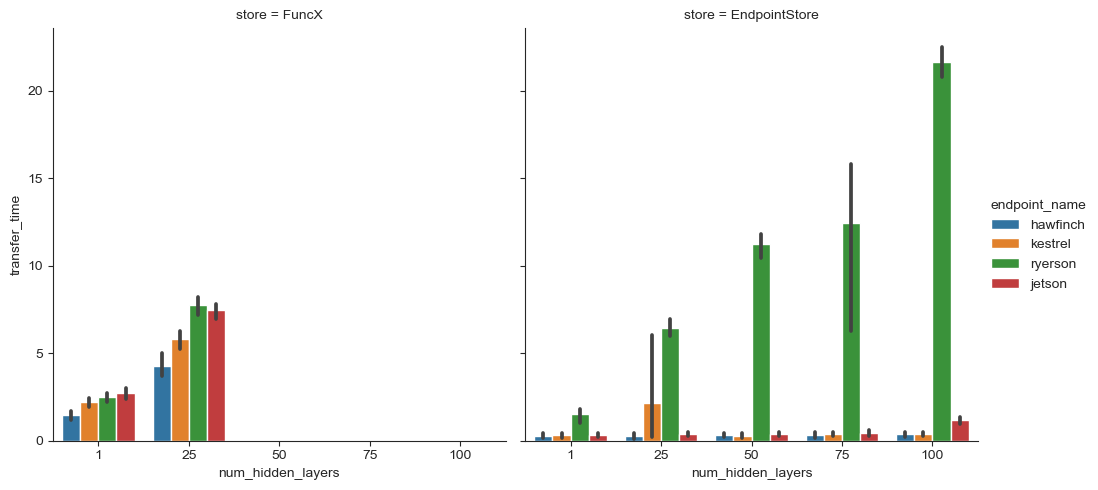

In [152]:
sns.catplot(
    data=data,
    kind="bar",
    col="store",
    x="num_hidden_layers",
    y="transfer_time",
    hue="endpoint_name",
    sharey=True
)
plt.show()

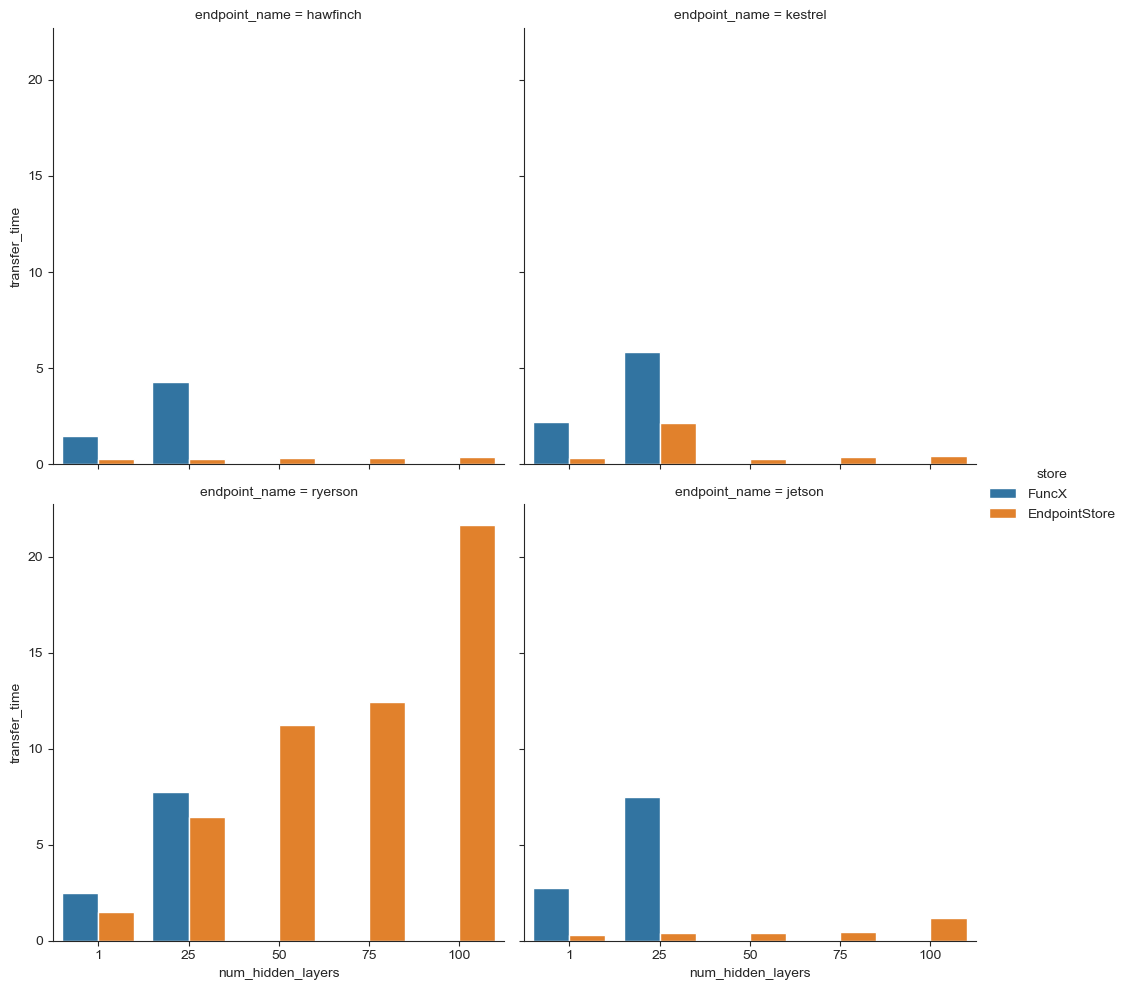

In [180]:
sns.catplot(
    data=data,
    kind="bar",
    col="endpoint_name",
    col_wrap=2,
    x="num_hidden_layers",
    y="transfer_time",
    hue="store",
    errorbar=None,
    sharey=True
)
plt.show()

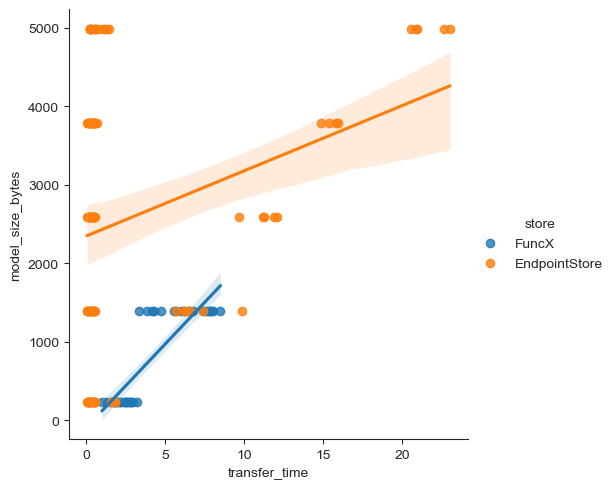

In [153]:
sns.lmplot(
    data=data,
    x="transfer_time",
    y="model_size_bytes",
    hue="store",
)
plt.show()

In [184]:
df = data.groupby(["store", "num_hidden_layers"])["transfer_time"].mean()
df
# (df.EndpointStore - df.FuncX) / df.FuncX  # Percentage increase from No-Store to ProxyStore
# (df.FuncX - df.EndpointStore) / df.EndpointStore  # Percentage increase from ProxyStore to No-Store

store          num_hidden_layers
EndpointStore  1                    0.600755
               25                   2.315877
               50                   3.053404
               75                   3.397973
               100                  5.896231
FuncX          1                    2.218290
               25                   6.327389
Name: transfer_time, dtype: float64

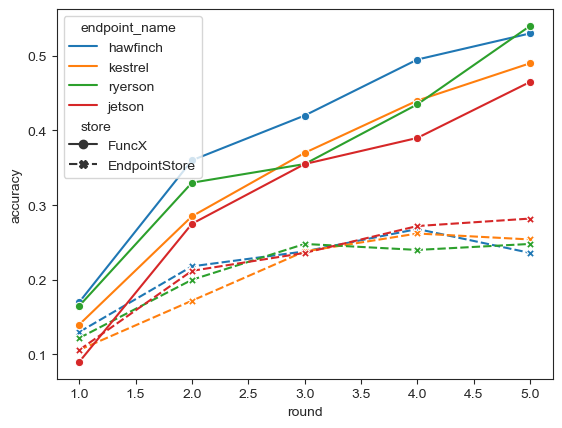

In [155]:
sns.lineplot(
    data=data,
    # kind="line",
    # col="store",
    x="round",
    y="accuracy",
    hue="endpoint_name",
    markers=True,
    style="store",
    errorbar=None,
)
plt.show()

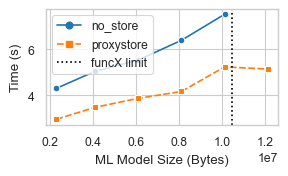

In [210]:
with sns.plotting_context(font_scale=1, context="paper"):
    fig = plt.figure(figsize=(3, 1.5))
    sns.lineplot(
        data=data,
        x="model_param_size",
        y="transfer_time",
        hue="store",
        markers=["o", "s"],
        style="store",
        errorbar=None,
    ).set(xscale="linear")
    plt.xlabel("ML Model Size (Bytes)")
    plt.ylabel("Time (s)")
    # plt.legend(bbox_to_anchor=(0.5, 1.2), ncol=2, loc="upper center")
    plt.axvline(10485760, label="funcX limit", color="k", linestyle=":")
    plt.legend(loc="upper left")
    # plt.tight_layout()
    plt.savefig(Path("out/plots/flox-size-transfer.pdf"), bbox_inches="tight")
    plt.show()

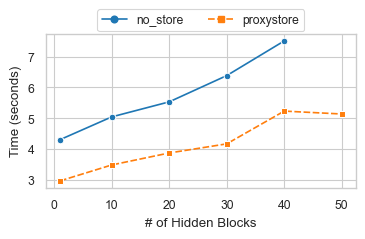

In [197]:
with sns.plotting_context(font_scale=1, context="paper"):
    fig = plt.figure(figsize=(4, 2))
    sns.lineplot(
        data=data,
        x="num_hidden_blocks",
        y="transfer_time",
        hue="store",
        markers=["o", "s"],
        style="store",
        errorbar=None,
    )  #.set(xscale="log")
    plt.xlabel("# of Hidden Blocks")
    plt.ylabel("Time (seconds)")
    plt.legend(bbox_to_anchor=(0.5, 1.2), ncol=2, loc="upper center")
    # plt.tight_layout()
    plt.show()